In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

In [2]:
# print("GPU Available: ", tf.test.is_gpu_available())
# tf.debugging.set_log_device_placement(True)

In [3]:
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#   # Restrict TensorFlow to only use the first GPU
#   try:
#     tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
#     logical_gpus = tf.config.experimental.list_logical_devices('GPU')
#     print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
#   except RuntimeError as e:
#     # Visible devices must be set before GPUs have been initialized
#     print(e)
    
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=3072)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [4]:
# 我们将以mlp对为，基础模型，然后介绍一些深度学习常见技巧， 如：
# 权重初始化， 激活函数， 优化器， 批规范化， dropout，模型集成

In [6]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape([x_train.shape[0], -1])
x_test = x_test.reshape([x_test.shape[0], -1])
print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)


(60000, 784)   (60000,)
(10000, 784)   (10000,)


In [7]:
# 2.基础模型

In [8]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer=keras.optimizers.Adam(),
             loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(x_train, y_train, batch_size=256, epochs=100, validation_split=0.3, verbose=1)


W0711 06:07:40.509709 140563961509632 deprecation.py:323] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================] - 2s 47us/sample - loss: 8.2464 - accuracy: 0.4807 - val_loss: 7.1473 - val_accuracy: 0.5509
Epoch 2/100
42000/42000 [==============================] - 1s 33us/sample - loss: 5.8212 - accuracy: 0.6318 - val_loss: 5.4804 - val_accuracy: 0.6540
Epoch 3/100
42000/42000 [==============================] - 1s 33us/sample - loss: 3.7419 - accuracy: 0.7581 - val_loss: 2.6328 - val_accuracy: 0.8276
Epoch 4/100
42000/42000 [==============================] - 1s 31us/sample - loss: 2.5026 - accuracy: 0.8372 - val_loss: 2.4999 - val_accuracy: 0.8368
Epoch 5/100
42000/42000 [==============================] - 1s 32us/sample - loss: 2.3123 - accuracy: 0.8500 - val_loss: 2.4904 - val_accuracy: 0.8381
Epoch 6/100
42000/42000 [==============================] - 1s 33us/sample - loss: 2.2630 - accuracy: 0.8531 - val_loss: 2.3505 - val_accuracy: 0.8476
Epoch 7/100
42000/42000 [=========================

Epoch 55/100
42000/42000 [==============================] - 1s 33us/sample - loss: 0.1059 - accuracy: 0.9894 - val_loss: 0.4226 - val_accuracy: 0.9602
Epoch 56/100
42000/42000 [==============================] - 1s 33us/sample - loss: 0.1051 - accuracy: 0.9889 - val_loss: 0.4064 - val_accuracy: 0.9626
Epoch 57/100
42000/42000 [==============================] - 1s 31us/sample - loss: 0.0852 - accuracy: 0.9911 - val_loss: 0.4173 - val_accuracy: 0.9632
Epoch 58/100
42000/42000 [==============================] - 1s 31us/sample - loss: 0.1011 - accuracy: 0.9892 - val_loss: 0.4092 - val_accuracy: 0.9639
Epoch 59/100
42000/42000 [==============================] - 1s 33us/sample - loss: 0.0855 - accuracy: 0.9907 - val_loss: 0.4023 - val_accuracy: 0.9632
Epoch 60/100
42000/42000 [==============================] - 1s 32us/sample - loss: 0.0760 - accuracy: 0.9922 - val_loss: 0.3809 - val_accuracy: 0.9654
Epoch 61/100
42000/42000 [==============================] - 1s 31us/sample - loss: 0.0760 - ac

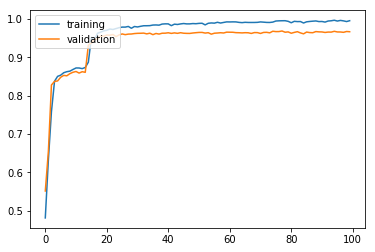

In [12]:
#要运行两次才显示图像，不知为什么
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='upper left')
plt.show()


In [11]:
result = model.evaluate(x_test, y_test)


10000/10000 [==============================] - 1s 86us/sample - loss: 0.2717 - accuracy: 0.9682


In [12]:
# 3.权重初始化

In [13]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', kernel_initializer='he_normal', input_shape=(784,)),
    layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer=keras.optimizers.Adam(),
             loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(x_train, y_train, batch_size=256, epochs=100, validation_split=0.3, verbose=1)
